# Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis [in this article](https://fivethirtyeight.com/features/fandango-movies-ratings/).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In this project, we'll analyze recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.


## Understanding the Dataset

We'll work with two samples of movie ratings: the data in one sample was collected *previous* to Hickey's analysis, while the other sample was collected *after*. Let's start by reading in the two datasets and getting familiar with their structure.

In [1]:
import pandas as pd

previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
# Isolating the columns that offer information we need for the analysis
fandango_previous = previous.loc[:,['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = after.loc[:, ['movie', 'year', 'fandango']]

In [3]:
fandango_previous.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [4]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is made of all the movie ratings stored on Fandango's website, regardless of the releasing year.

Because we want to find out whether the parameters of this population changed after Hickey's analysis, we're interested in sampling the population at two different periods in time — previous and after Hickey's analysis — so we can compare the two states.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From Hickey's article and from the `README.md` of [the data set's repository](https://github.com/fivethirtyeight/data/tree/master/fandango), we can see that he used the following sampling criteria:

- The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
- The movie must have had tickets on sale in 2015.

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we're interested to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions for our other sample were (as it can be read in the `README.md` of [the data set's repository](https://github.com/mircealex/Movie_ratings_2016_17)):

- The movie must have been released in 2016 or later.
- The movie must have had a considerable number of votes and reviews (unclear how many from the `README.md` or from the data).

This second sample is also subject to temporal trends and it's unlikely to be representative of our population of interest.

Both these authors had certain research questions in mind when they sampled the data, and they used a set of criteria to get a sample that would fit their questions. Their sampling method is called purposive sampling (or judgmental/selective/subjective sampling). While these samples were good enough for their research, they don't seem too useful for us.


## Changing the Goal of our Analysis

At this point, we can either collect new data or change the goal of our analysis. We choose the latter and place some limitations on our initial goal.

Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.


## Isolating the Samples

With this new goal,, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

Our second dataset doesn't provide information about the number of fan ratings. One quick way to check the representativity of this sample is to sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website.

In [5]:
fandango_after.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is a good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

|Movie|Fan ratings|
|---|---|
|Mechanic: Resurrection|2247|
|Warcraft|7271|
|Max Steel|493|
|Me Before You|5263|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

Let's double-check the other dataset for popular movies.

In [6]:
sum(fandango_previous['Fandango_votes'] < 30)

0

Let's extract the year data from the film name and get rid of movies that were not released in 2015 and 2016.

In [7]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [10]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [11]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes of 2015 and 2016 Dataset

We can now start analyzing the two samples we isolated before. Let's start with making a comparison between the shapes of the distributions of movie ratings for both samples.

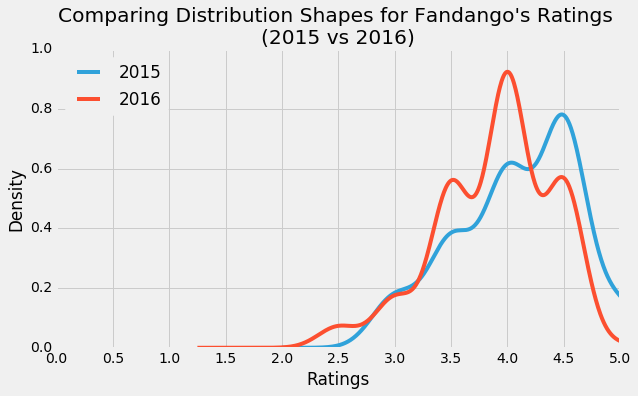

In [21]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (9, 5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing Distribution Shapes for Fandango's Ratings \n(2015 vs 2016)")
plt.xlabel('Ratings')
plt.xlim(0, 5)
plt.xticks(arange(0, 5.1, 0.5))
plt.show()

From the graph above, we can easily notice two things:

- Both distributions are strongly left skewed
- The distribution of 2016 is slightly moved to the left compared to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly 4 to 5 fan ratings. Coupled with the fact that Fandango sells movie tickets, the high ratings are little bit doubtful.

The slight left shift of the 2016 distribution is the interesting part for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference between Fandango's ratings for popular movies in 2015 and 2016.


## Comparing Frequency Tables

Let's examine frequency tables of the two distributions. Because the datasets have different number of movies, we normalize the tables and show percentages instead.

In [29]:
print("2015 Frenquency Table")
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015 Frenquency Table


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [30]:
print("2016 Frequency Table")
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016 Frequency Table


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2016, very high ratings (4.5 and 5) had signicantly lower percentages compared to 2015. In 2016, under 1% of the movies had 5 star ratings, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 - there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 - 2.5 instead of 3, the minimum of 2015. There is a clear difference between the two frequency tables.


## Determining the Direction of the Change

Let's take a couple of summary statistics to get a more precise picture about the direction of the difference. We'll take each distribution of movie ratings and compute its mean, median, and mode, and then compare these statistics to determine what they tell about the direction of the difference.

In [31]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]
mode_2016 = fandango_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]

summary.index = ['mean', 'median', 'mode']

summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


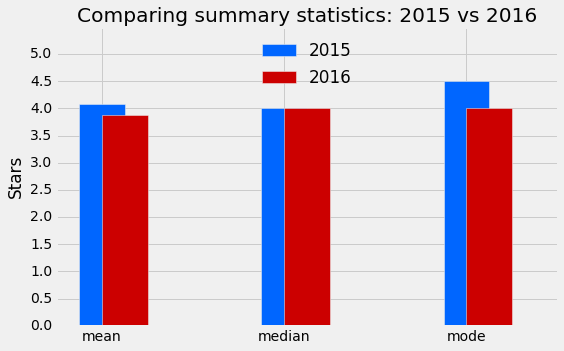

In [32]:
plt.style.use('fivethirtyeight')

summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = 0.25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = 0.25, rot = 0, figsize = (8, 5))

plt.title('Comparing summary statistics: 2015 vs 2016')
plt.ylim(0, 5.5)
plt.yticks(arange(0, 5.1, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()


The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

While median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated lower than popular movies released in 2015.


## Conclusion

Our analysis showed that there's a slight change in Fandango's ratings for popular movies in 2015 and 2016. On average, popular movies released in 2016 got slightly lower ratings compared to the popular movies released in 2015.

We cannot be completely sure what caused the change because we lack information, but the chances are very high that it was caused by Fandango fixing the biased rating system after Hickey's analysis.